# Data606- PaperCraft Project Dataset Exploration

## Import Libraries

In [14]:
import requests
import csv
import xml.etree.ElementTree as ET
import uuid
import numpy as np
from time import sleep
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Dataset Preparation (Scraping)

In [ ]:
def get_data(keyword, category, sortby, sort_order, max_results, start):

    url = f"http://export.arxiv.org/api/query?search_query=cat:{category}&max_results={max_results}&sort_by={sortby}&sort_order{sort_order}&start={start}"

    response = requests.get(url)

    root = ET.fromstring(response.content)
    data = []
    for entry in root.findall('{http://www.w3.org/2005/Atom}entry'):
        title = entry.find('{http://www.w3.org/2005/Atom}title').text
        summary = entry.find('{http://www.w3.org/2005/Atom}summary').text
        author = entry.find('{http://www.w3.org/2005/Atom}author/{http://www.w3.org/2005/Atom}name').text
        published = entry.find('{http://www.w3.org/2005/Atom}published').text
        link = entry.find('{http://www.w3.org/2005/Atom}link[@type="text/html"]')
        if link is not None:
            link = link.attrib['href']

        data.append([uuid.uuid4(), title, summary, author, published, link])
    return data

## Exploratory Data Analysis

Importing Dataset with Pandas

In [2]:
df=pd.read_csv('papers_data2.csv')
df = df[['id', 'Title', 'Summary', 'Authors', 'Published', 'Link']]

Columns of the dataset are

In [3]:
df.columns

Index(['id', 'Title', 'Summary', 'Authors', 'Published', 'Link'], dtype='object')

Dataset Size:

In [7]:
print("Shape of the dataset ",df.shape)

Shape of the dataset  (9500, 6)


Checking sample Titles of some of the research papers

In [8]:
df['Title'].head()

0    A Market-Oriented Programming Environment and ...
1              An Empirical Analysis of Search in GSAT
2    The Difficulties of Learning Logic Programs wi...
3    Software Agents: Completing Patterns and Const...
4    Decidable Reasoning in Terminological Knowledg...
Name: Title, dtype: object

Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         9500 non-null   object
 1   Title      9500 non-null   object
 2   Summary    9500 non-null   object
 3   Authors    9500 non-null   object
 4   Published  9500 non-null   object
 5   Link       9500 non-null   object
dtypes: object(6)
memory usage: 445.4+ KB


Sample Values

In [ ]:
df.head()

,id,Title,Summary,Authors,Published,Link
0,774373a4-8aa1-49ae-9707-4a20a6c3558d,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-under...,M. P. Wellman,1993-08-01T00:00:00Z,http://arxiv.org/abs/cs/9308102v1
1,3aa3b1eb-6219-4f6a-8025-9708e1c3cba5,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in ...,I. P. Gent,1993-09-01T00:00:00Z,http://arxiv.org/abs/cs/9309101v1
2,e0a52b84-b04e-413c-8f4e-ef13b190be7a,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (...,F. Bergadano,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311101v1
3,0cece879-3e29-4faf-90e5-2e2c9b19aad0,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to rec...,J. C. Schlimmer,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311102v1
4,aa9305bb-b2db-49c3-9cdb-904741f57596,Decidable Reasoning in Terminological Knowledg...,Terminological knowledge representation syst...,M. Buchheit,1993-12-01T00:00:00Z,http://arxiv.org/abs/cs/9312101v1


## Preprocessing

Summary Statistics

In [9]:
df.describe(include='object')

,id,Title,Summary,Authors,Published,Link
count,9500,9500,9500,9500,9500,9500
unique,9500,9479,9492,6519,9401,9500
top,774373a4-8aa1-49ae-9707-4a20a6c3558d,Ordinal Monte Carlo Tree Search,Markov decision processes (MDPs) are widely ...,Joseph Y. Halpern,2012-02-14T16:41:17Z,http://arxiv.org/abs/cs/9308102v1
freq,1,2,2,43,25,1


- Handling Missing Data/Null Values

In [10]:
df.isna().sum()

id           0
Title        0
Summary      0
Authors      0
Published    0
Link         0
dtype: int64

In [11]:
df.nunique()

id           9500
Title        9479
Summary      9492
Authors      6519
Published    9401
Link         9500
dtype: int64

### Exploring Title length for different papers

In [12]:
Title_lengths = df['Title'].str.len()

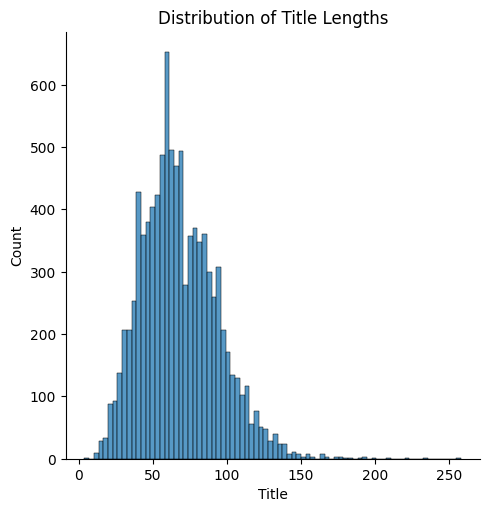

In [16]:
sns.displot(Title_lengths)

# Set the title for the plot
plt.title("Distribution of Title Lengths")

# Show the plot
plt.show()

In [18]:
Summary_lengths = df['Summary'].str.len()

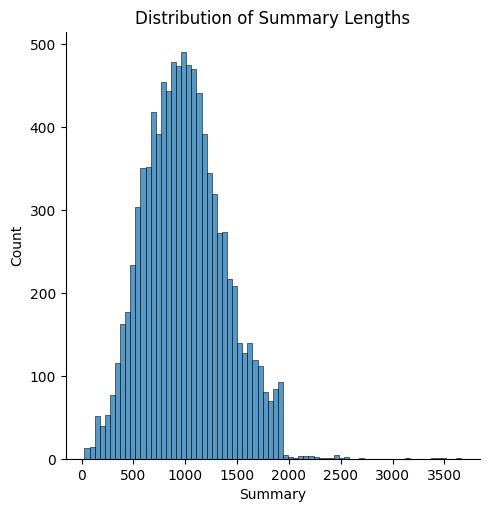

In [19]:
sns.displot(Summary_lengths)

# Set the title for the plot
plt.title("Distribution of Summary Lengths")

# Show the plot
plt.show()

### Stopwords analysis

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word.lower() in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

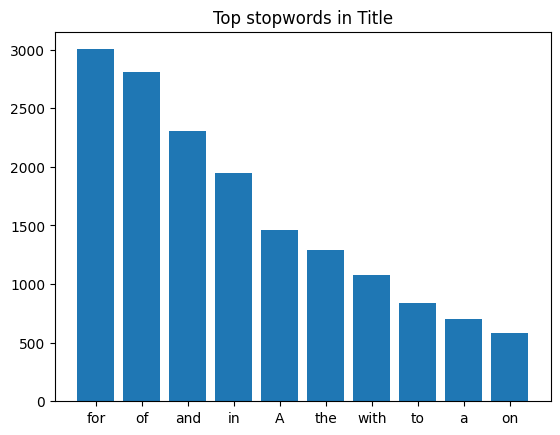

In [38]:
plot_top_stopwords_barchart(df['Title'])
# Set the title for the plot
plt.title("Top stopwords in Title")

# Show the plot
plt.show()

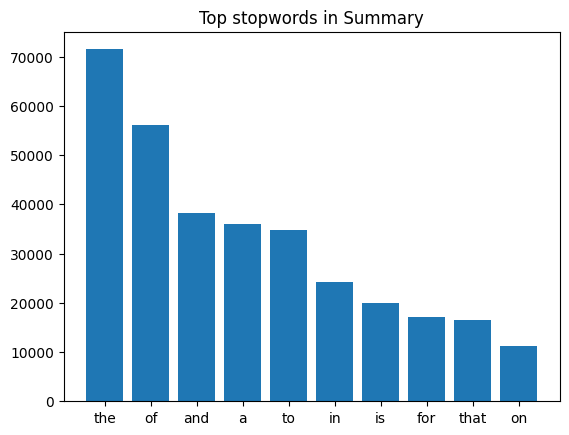

In [39]:
plot_top_stopwords_barchart(df['Summary'])
# Set the title for the plot
plt.title("Top stopwords in Summary")

# Show the plot
plt.show()

In [40]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word.lower() not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

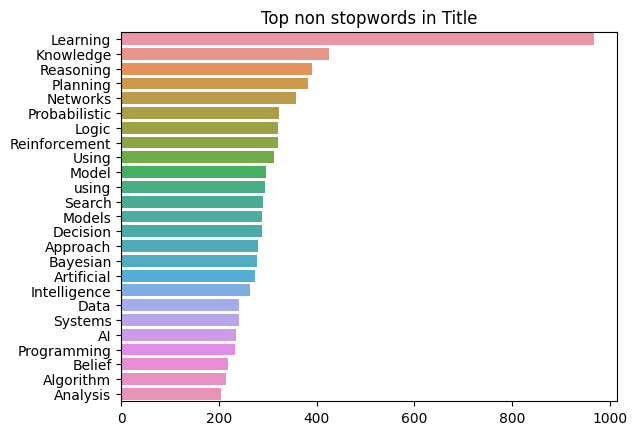

In [41]:
plot_top_non_stopwords_barchart(df['Title'])

# Set the title for the plot
plt.title("Top non stopwords in Title")

# Show the plot
plt.show()

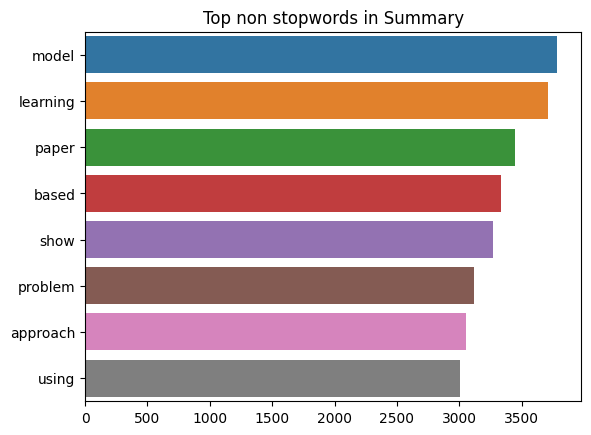

In [42]:
plot_top_non_stopwords_barchart(df['Summary'])

# Set the title for the plot
plt.title("Top non stopwords in Summary")

# Show the plot
plt.show()

In [ ]:
def display_options():
    display = pd.options.display
    display.max_columns = 5
    display.max_rows = 4
    display.max_colwidth = 222
    display.width = None
    return None

### System Architecture

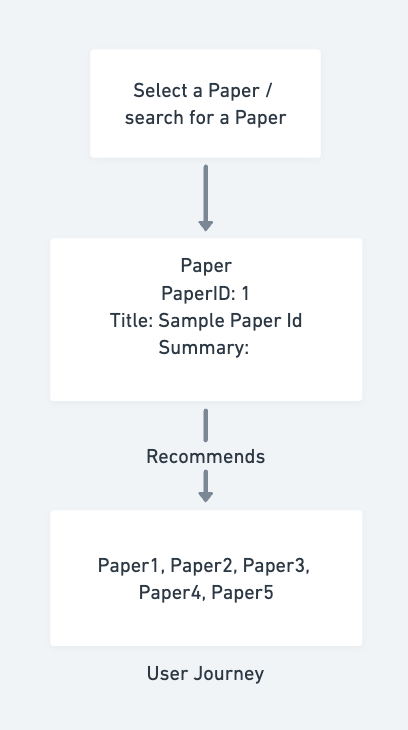

### Sample example for the system

In [ ]:
df.head()

,id,Title,Summary,Authors,Published,Link
0,774373a4-8aa1-49ae-9707-4a20a6c3558d,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-under...,M. P. Wellman,1993-08-01T00:00:00Z,http://arxiv.org/abs/cs/9308102v1
1,3aa3b1eb-6219-4f6a-8025-9708e1c3cba5,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in ...,I. P. Gent,1993-09-01T00:00:00Z,http://arxiv.org/abs/cs/9309101v1
2,e0a52b84-b04e-413c-8f4e-ef13b190be7a,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (...,F. Bergadano,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311101v1
3,0cece879-3e29-4faf-90e5-2e2c9b19aad0,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to rec...,J. C. Schlimmer,1993-11-01T00:00:00Z,http://arxiv.org/abs/cs/9311102v1
4,aa9305bb-b2db-49c3-9cdb-904741f57596,Decidable Reasoning in Terminological Knowledg...,Terminological knowledge representation syst...,M. Buchheit,1993-12-01T00:00:00Z,http://arxiv.org/abs/cs/9312101v1


In [ ]:
index = input("Enter Paper index: ")
print("Recommended Papers:")
df.iloc[int(index):int(index)+5,1:2]

Enter Paper index: 10
Recommended Papers:


,Title
10,A Semantics and Complete Algorithm for Subsump...
11,Applying GSAT to Non-Clausal Formulas
12,Random Worlds and Maximum Entropy
13,Pattern Matching and Discourse Processing in I...
14,A System for Induction of Oblique Decision Trees


Top N-Grams Analysis

In [43]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

Top bi grams for the title

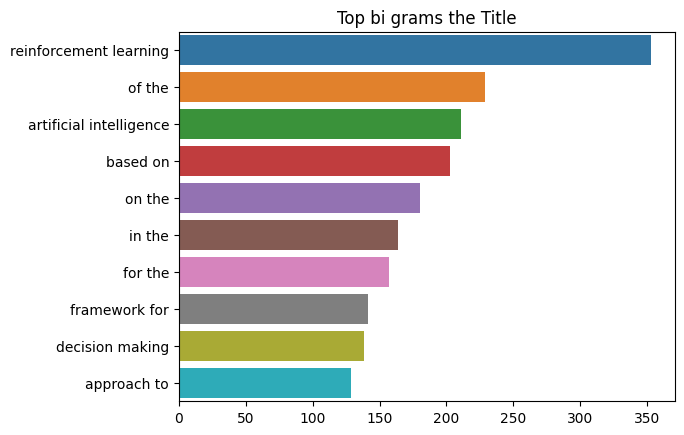

In [48]:
plot_top_ngrams_barchart(df['Title'],2)

# Set the title for the plot
plt.title("Top bi grams the Title")

# Show the plot
plt.show()

Tri-Grams for the Title

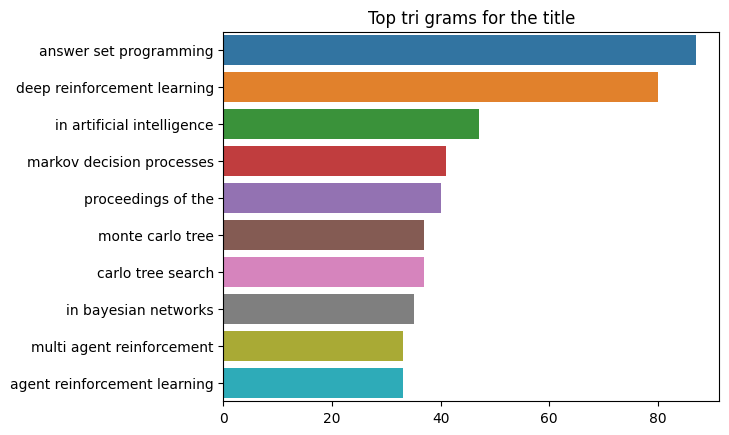

In [47]:
plot_top_ngrams_barchart(df['Title'],3)

# Set the title for the plot
plt.title("Top tri grams for the title")

# Show the plot
plt.show()

This chart is to view top bi grams the Summary

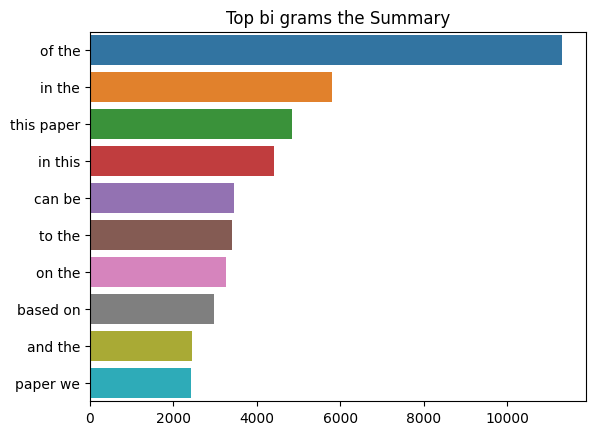

In [49]:
plot_top_ngrams_barchart(df['Summary'],2)

# Set the title for the plot
plt.title("Top bi grams the Summary")

# Show the plot
plt.show()

To view top tri grams for the summary

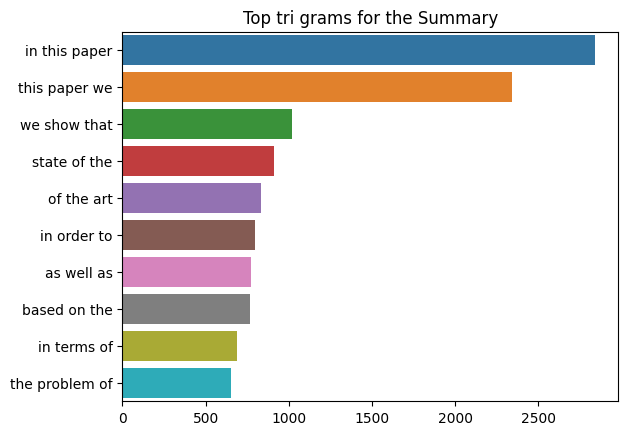

In [50]:
plot_top_ngrams_barchart(df['Summary'],3)

# Set the title for the plot
plt.title("Top tri grams for the Summary")

# Show the plot
plt.show()